Fit a logistic regression model to classify neural events using the fourier data from eeg signals

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets as skdata
import sklearn.metrics as skmetrics
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [2]:
# MAKE SURE TO CHANGE THIS TO THE LOCAL PATH TO DATA
TRAIN_PATH = "train_10000_samples_0_to_10_hz_consensus_0.66.csv"

data = pd.read_csv(TRAIN_PATH)

data_np = data.to_numpy()

print(data_np)
print(data_np.shape)

[[810.38916015625 8963.51998182945 6902.732835170536 ...
  1.2809716424667708 1.850806140044379 'Other']
 [3347.219482421875 74727.07995611429 6513.423011647474 ...
  0.1844250276289941 -2.447707410084138 'Other']
 [4080.108154296875 34059.76976430416 79942.63872161313 ...
  0.1804917381863561 -0.8095972532309009 'Other']
 ...
 [1779.604248046875 1117.5798633694649 13310.58979227646 ...
  -1.195619934993869 2.657257233013577 'LPD']
 [9889.0107421875 45864.43010939472 2528.0341448907734 ...
  2.300058339476117 -3.0057713406965627 'Seizure']
 [4741.4873046875 29489.410071905702 13434.48454525358 ...
  -2.213025873538869 0.4518180399279488 'Seizure']]
(9938, 2421)


In [3]:
num_input = data_np.shape[1] - 1

x = data_np[:, 0:num_input]
y = data_np[:, num_input]

# Shuffle the dataset based on sample indices
shuffled_indices = np.random.permutation(x.shape[0])

# Choose the first 80% as training set, next 10% as validation and the rest as testing
train_split_idx = int(0.80 * x.shape[0])
val_split_idx = int(0.90 * x.shape[0])

train_indices = shuffled_indices[0:train_split_idx]
val_indices = shuffled_indices[train_split_idx:val_split_idx]
test_indices = shuffled_indices[val_split_idx:]

# Select the examples from x and y to construct our training, validation, testing sets
x_train, y_train = x[train_indices, :], y[train_indices]
x_val, y_val = x[val_indices, :], y[val_indices]
x_test, y_test = x[test_indices, :], y[test_indices]

In [4]:
# Test out a number of models
models = []
val_scores = []

solver = 'newton-cg'
penalties = ['none', 'l2'] # l2 is ridge regression
num_iterations = [150, 250, 350, 450]

for penalty in penalties:

    for iter in num_iterations:

        model = LogisticRegression(solver=solver, max_iter = iter, penalty=penalty)

        model.fit(x_train, y_train)

        models.append(model)

        predictions_train = model.predict(x_train)
        score_train = model.score(x_train, y_train)

        predictions_val = model.predict(x_val)
        score_val = model.score(x_val, y_val)

        val_scores.append(score_val)

        print('Solver: {}, Iterations: {}, Penalty: {}'.format(solver, iter, penalty))
        print('Training accuracy: {:0.5f}  Validation accuracy: {:0.2f}%'.format(score_train*100, score_val*100))

# Choose the best model based on highest validation accuracy
print(val_scores)
best_model_idx = np.argmax(val_scores)
best_model = models[best_model_idx]


# Sanity check
print('\nBest Penalty: {}'.format(penalties[best_model_idx // len(num_iterations)]))
print('Best Iterations: {}'.format(num_iterations[best_model_idx % len(num_iterations)]))

# Best solver on the test set
predictions_test = best_model.predict(x_test)
score_test = best_model.score(x_test, y_test)

print("The test results.... {:0.2f}%".format(score_test*100))

c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 150, Penalty: none
Training accuracy: 56.15094  Validation accuracy: 43.66%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 250, Penalty: none
Training accuracy: 59.45912  Validation accuracy: 43.76%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 350, Penalty: none
Training accuracy: 61.32075  Validation accuracy: 44.06%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 450, Penalty: none
Training accuracy: 62.84277  Validation accuracy: 44.37%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 150, Penalty: l2
Training accuracy: 56.74214  Validation accuracy: 43.46%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 250, Penalty: l2
Training accuracy: 59.53459  Validation accuracy: 43.66%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 350, Penalty: l2
Training accuracy: 61.09434  Validation accuracy: 44.37%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 450, Penalty: l2
Training accuracy: 62.81761  Validation accuracy: 44.67%
[0.43661971830985913, 0.43762575452716296, 0.44064386317907445, 0.44366197183098594, 0.4346076458752515, 0.43661971830985913, 0.44366197183098594, 0.44668008048289737]

Best Penalty: l2
Best Iterations: 450
The test results.... 50.70%


Text(0.5, 1.0, 'Accuracy Score: 0.5070422535211268')

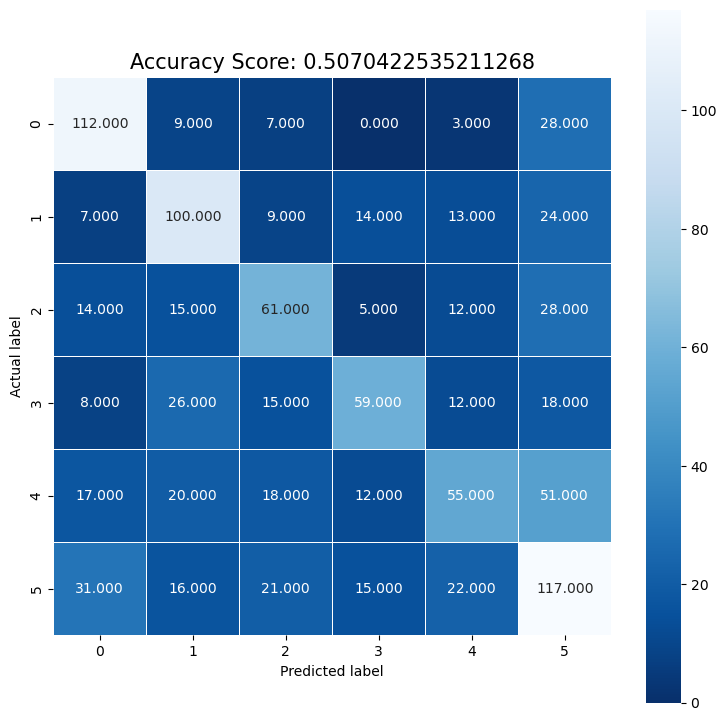

In [5]:
cm = skmetrics.confusion_matrix(y_test, predictions_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_test)
plt.title(all_sample_title, size = 15)